In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Filter out valid period
start_date = '2020-04-21'
end_date = '2021-02-10'


def valid_period(data, start_date, end_date):
    data = data.loc[(data['date'] >= start_date) & (data['date'] <= end_date)].reset_index(drop=True)

    # Reverse time series
    index_start = data.loc[(data['date'] == start_date)].index.tolist()[0]
    index_end = data.loc[(data['date'] == end_date)].index.tolist()[0]
    if index_start > index_end:
        data = data.loc[::-1].reset_index(drop=True)
    return data


# <span style='font-family:"Times New Roman"'> <span styel=''>Feature #1 Deaths

In [3]:
df = pd.read_csv('NewCases_Data/Raw data/Deaths within 28 days of positive test by date reported_UK_Feb-11.csv')
f_deaths = df[['date', 'newDeaths28DaysByPublishDate']]

f_deaths = valid_period(f_deaths, start_date, end_date)
f_deaths


,date,newDeaths28DaysByPublishDate
0,2020-04-21,1224
1,2020-04-22,847
2,2020-04-23,682
3,2020-04-24,1010
4,2020-04-25,815
...,...,...
291,2021-02-06,828
292,2021-02-07,373
293,2021-02-08,333
294,2021-02-09,1052


# <span style='font-family:"Times New Roman"'> <span styel=''>Feature #2 Patients admitted to hospital

In [4]:
df = pd.read_csv('NewCases_Data/Raw data/Patients admitted to hospital-Feb-14.csv')
f_Adh = df[['date', 'newAdmissions']]

f_Adh = valid_period(f_Adh, start_date, end_date)
f_Adh


,date,newAdmissions
0,2020-04-21,1713
1,2020-04-22,1527
2,2020-04-23,1513
3,2020-04-24,1525
4,2020-04-25,1255
...,...,...
291,2021-02-06,1880
292,2021-02-07,1846
293,2021-02-08,1909
294,2021-02-09,1743


# <span style='font-family:"Times New Roman"'> <span styel=''>Feature #3 Patients in hospital

In [5]:
df = pd.read_csv('NewCases_Data/Raw data/Patients in hospital_UK_2021-Feb-11.csv')
f_ph = df[['date', 'hospitalCases']]

f_ph = valid_period(f_ph, start_date, end_date)
f_ph


,date,hospitalCases
0,2020-04-21,19139
1,2020-04-22,18533
2,2020-04-23,17867
3,2020-04-24,17063
4,2020-04-25,16604
...,...,...
291,2021-02-06,26881
292,2021-02-07,26767
293,2021-02-08,26706
294,2021-02-09,25643


# <span style='font-family:"Times New Roman"'> <span styel=''>Feature #4 Patients in MVBeds

In [6]:
df = pd.read_csv('NewCases_Data/Raw data/Patients in mechanical ventilation beds_UK_2021-Feb-12.csv')
f_MVBeds = df[['date', 'covidOccupiedMVBeds']]

f_MVBeds = valid_period(f_MVBeds, start_date, end_date)
f_MVBeds


,date,covidOccupiedMVBeds
0,2020-04-21,3036
1,2020-04-22,2964
2,2020-04-23,2867
3,2020-04-24,2703
4,2020-04-25,2702
...,...,...
291,2021-02-06,3373
292,2021-02-07,3302
293,2021-02-08,3230
294,2021-02-09,3164


# <span style='font-family:"Times New Roman"'> <span styel=''>Feature #5 Mobility indices for London

In [7]:
df = pd.read_csv('NewCases_Data/Raw data/Citymapper_Mobility_Index.csv')
f_mobility = df[['Date', 'London']]

f_mobility.drop(f_mobility.head(92).index, inplace=True)
f_mobility.drop(f_mobility.tail(2).index, inplace=True)
f_mobility = f_mobility.reset_index(drop=True)
f_mobility


,Date,London
0,2020/4/21,0.09
1,2020/4/22,0.09
2,2020/4/23,0.09
3,2020/4/24,0.09
4,2020/4/25,0.08
...,...,...
291,2021/2/6,0.21
292,2021/2/7,0.21
293,2021/2/8,0.24
294,2021/2/9,0.22


In [8]:
features = pd.concat([f_deaths, f_Adh, f_ph, f_MVBeds, f_mobility], axis=1)
features.drop(['date', 'Date'], axis=1, inplace=True)
features


,newDeaths28DaysByPublishDate,newAdmissions,hospitalCases,covidOccupiedMVBeds,London
0,1224,1713,19139,3036,0.09
1,847,1527,18533,2964,0.09
2,682,1513,17867,2867,0.09
3,1010,1525,17063,2703,0.09
4,815,1255,16604,2702,0.08
...,...,...,...,...,...
291,828,1880,26881,3373,0.21
292,373,1846,26767,3302,0.21
293,333,1909,26706,3230,0.24
294,1052,1743,25643,3164,0.22


# <span style='font-family:"Times New Roman"'> <span styel=''>Feature #6 Daily confirmed cases

In [9]:
df = pd.read_csv('NewCases_Data/Raw data/cases by date reported_UK_2021-Feb-10.csv')
cases = df[['date', 'newCasesByPublishDate']]
cases = valid_period(cases, start_date, end_date)
cases


,date,newCasesByPublishDate
0,2020-04-21,4301
1,2020-04-22,4451
2,2020-04-23,4583
3,2020-04-24,5386
4,2020-04-25,4913
...,...,...
291,2021-02-06,18262
292,2021-02-07,15845
293,2021-02-08,14104
294,2021-02-09,12364


# <span style='font-family:"Times New Roman"'> <span styel=''>Aggregate all features

In [10]:
df_data = pd.concat([cases, features], axis=1)
print(df_data.isna().sum())
df_data = df_data.fillna(method='ffill')
df_data


date                            0
newCasesByPublishDate           0
newDeaths28DaysByPublishDate    0
newAdmissions                   0
hospitalCases                   0
covidOccupiedMVBeds             0
London                          0
dtype: int64


,date,newCasesByPublishDate,newDeaths28DaysByPublishDate,newAdmissions,hospitalCases,covidOccupiedMVBeds,London
0,2020-04-21,4301,1224,1713,19139,3036,0.09
1,2020-04-22,4451,847,1527,18533,2964,0.09
2,2020-04-23,4583,682,1513,17867,2867,0.09
3,2020-04-24,5386,1010,1525,17063,2703,0.09
4,2020-04-25,4913,815,1255,16604,2702,0.08
...,...,...,...,...,...,...,...
291,2021-02-06,18262,828,1880,26881,3373,0.21
292,2021-02-07,15845,373,1846,26767,3302,0.21
293,2021-02-08,14104,333,1909,26706,3230,0.24
294,2021-02-09,12364,1052,1743,25643,3164,0.22


# <span style='font-family:"Times New Roman"'> <span styel=''>Export to csv file

In [11]:
# df_data.to_csv('NewCases_Data/export_dataframe.csv', index=False, header=True)


# <span style='font-family:"Times New Roman"'> <span styel=''>Plot all features

In [12]:
df_data = df_data[['date','newCasesByPublishDate','newDeaths28DaysByPublishDate','newAdmissions'
                   ,'hospitalCases','covidOccupiedMVBeds','London']]

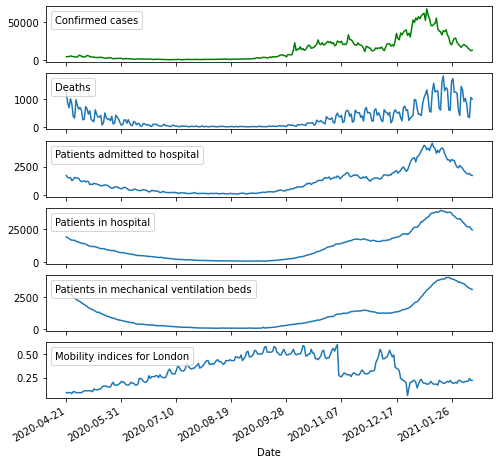

In [15]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(8, 8))
ax1.plot(df_data['date'], df_data['newCasesByPublishDate'], color='green')
ax1.legend(['Confirmed cases'], loc='upper left', handlelength=0, handletextpad=0, fancybox=True)

ax2.plot(df_data['date'], df_data['newDeaths28DaysByPublishDate'])
ax2.legend(['Deaths'], loc='upper left', handlelength=0, handletextpad=0, fancybox=True)

ax3.plot(df_data['date'], df_data['newAdmissions'])
ax3.legend(['Patients admitted to hospital'], loc='upper left', handlelength=0, handletextpad=0, fancybox=True)

ax4.plot(df_data['date'], df_data['hospitalCases'])
ax4.legend(['Patients in hospital'], loc='upper left', handlelength=0, handletextpad=0, fancybox=True)

ax5.plot(df_data['date'], df_data['covidOccupiedMVBeds'])
ax5.legend(['Patients in mechanical ventilation beds'], loc='upper left', handlelength=0, handletextpad=0, fancybox=True)

ax6.plot(df_data['date'], df_data['London'])
ax6.legend(['Mobility indices for London'], loc='upper left', handlelength=0, handletextpad=0, fancybox=True)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.savefig('1.svg')
